In [1]:
install.packages("WDI")
install.packages("forecast")
install.packages("ggplot2")
install.packages("TSA")
install.packages("dplyr")


The downloaded binary packages are in
	/var/folders/tt/5swmzhn10p3c6xwhpwvkw6w40000gn/T//Rtmp0DFpH3/downloaded_packages

The downloaded binary packages are in
	/var/folders/tt/5swmzhn10p3c6xwhpwvkw6w40000gn/T//Rtmp0DFpH3/downloaded_packages

The downloaded binary packages are in
	/var/folders/tt/5swmzhn10p3c6xwhpwvkw6w40000gn/T//Rtmp0DFpH3/downloaded_packages

The downloaded binary packages are in
	/var/folders/tt/5swmzhn10p3c6xwhpwvkw6w40000gn/T//Rtmp0DFpH3/downloaded_packages

The downloaded binary packages are in
	/var/folders/tt/5swmzhn10p3c6xwhpwvkw6w40000gn/T//Rtmp0DFpH3/downloaded_packages


In [2]:
library(WDI)
library(forecast)
library(ggplot2)
library(TSA)
library(dplyr)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Adjuntando el paquete: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Adjuntando el paquete: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Descargar datos de nacimientos del Banco Mundial
births_data <- WDI(indicator = "SP.DYN.CBRT.IN", country = "1W", start = 1960, end = 2021)

# Ver los primeros registros
head(births_data)

,country,iso2c,iso3c,year,SP.DYN.CBRT.IN
,<chr>,<chr>,<chr>,<int>,<dbl>
1,World,1W,WLD,2021,16.93866
2,World,1W,WLD,2020,17.22661
3,World,1W,WLD,2019,17.81770
4,World,1W,WLD,2018,18.17881
5,World,1W,WLD,2017,18.70010
6,World,1W,WLD,2016,19.17389


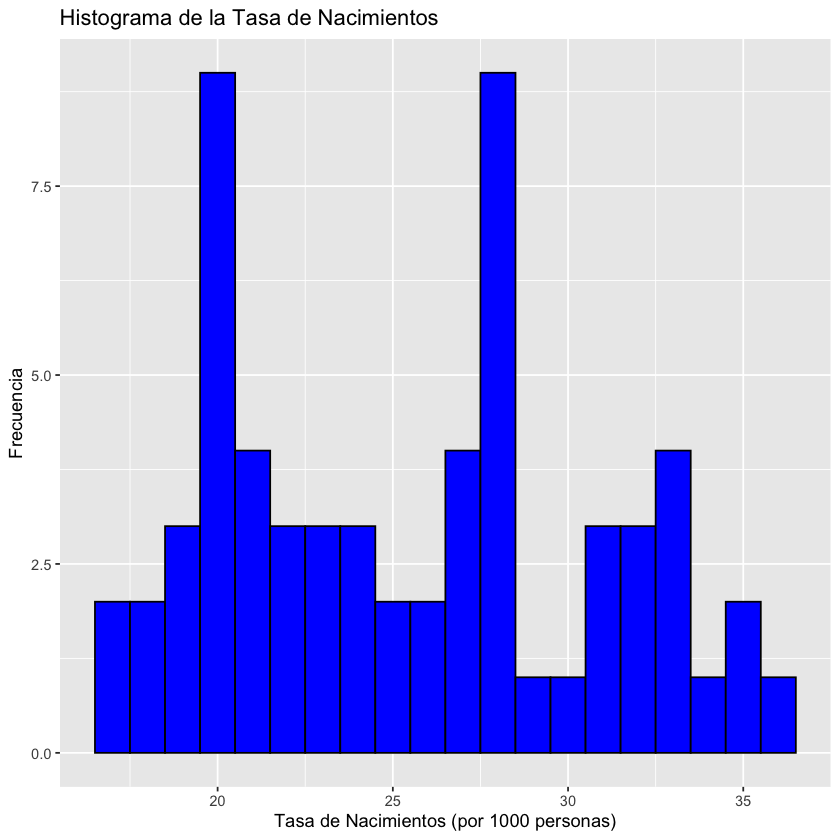

In [4]:
# Histograma de la tasa de nacimientos
ggplot(births_data, aes(x = SP.DYN.CBRT.IN)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Histograma de la Tasa de Nacimientos",
       x = "Tasa de Nacimientos (por 1000 personas)",
       y = "Frecuencia")


Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


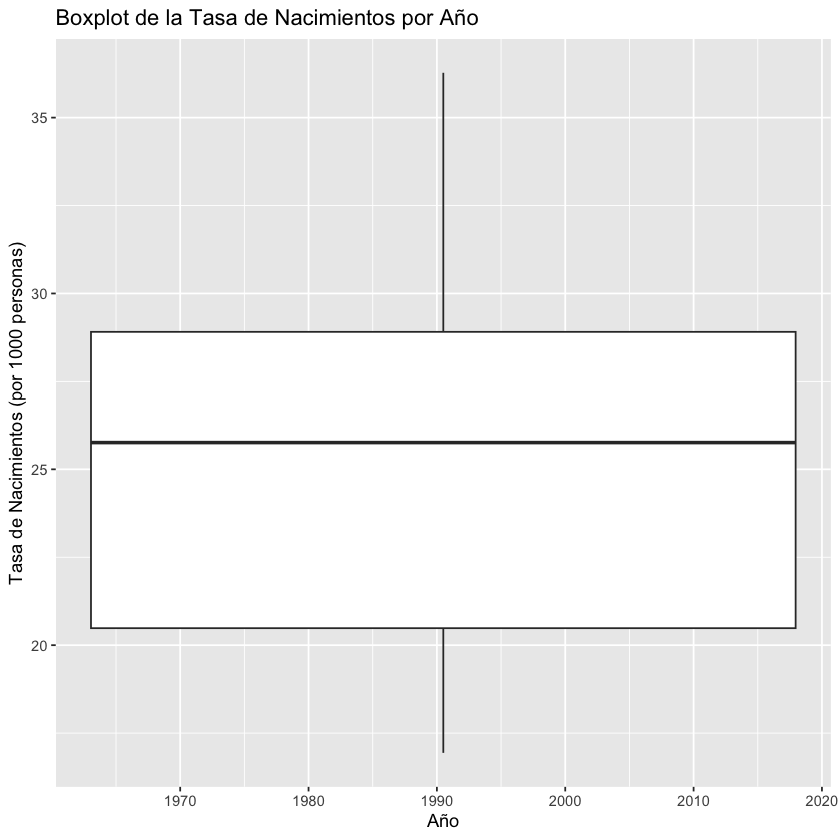

In [5]:
# Boxplot por año
ggplot(births_data, aes(x = year, y = SP.DYN.CBRT.IN)) +
  geom_boxplot() +
  labs(title = "Boxplot de la Tasa de Nacimientos por Año",
       x = "Año",
       y = "Tasa de Nacimientos (por 1000 personas)")


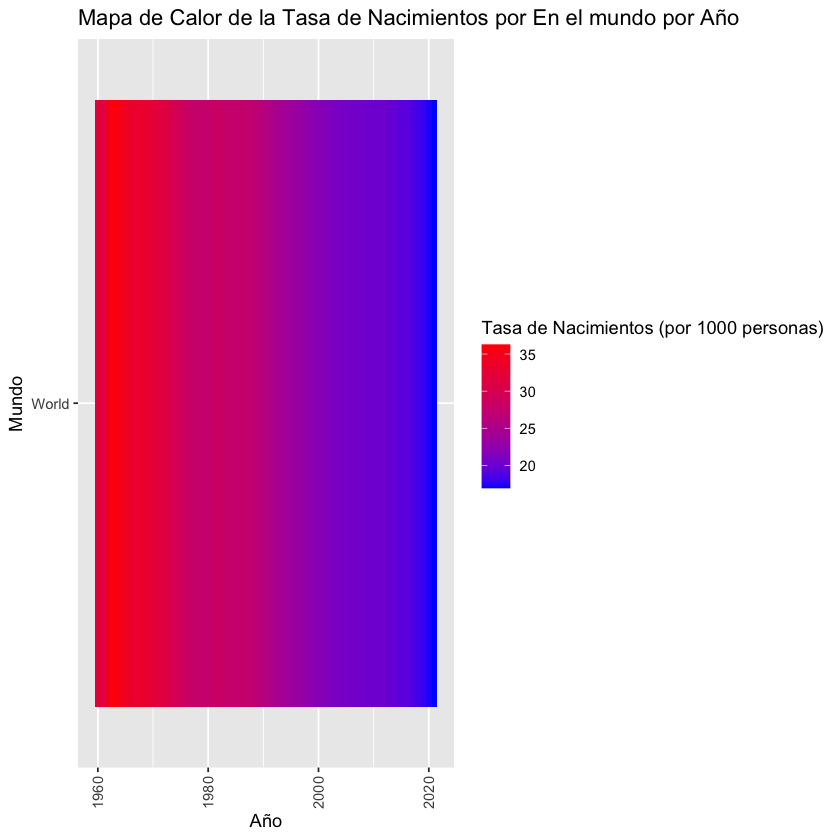

In [6]:
# Crear el mapa de calor
ggplot(births_data, aes(x = year, y = country, fill = SP.DYN.CBRT.IN)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Mapa de Calor de la Tasa de Nacimientos por En el mundo por Año",
       x = "Año",
       y = "Mundo",
       fill = "Tasa de Nacimientos (por 1000 personas)") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))  # Rotar etiquetas del eje x para mejor visualización

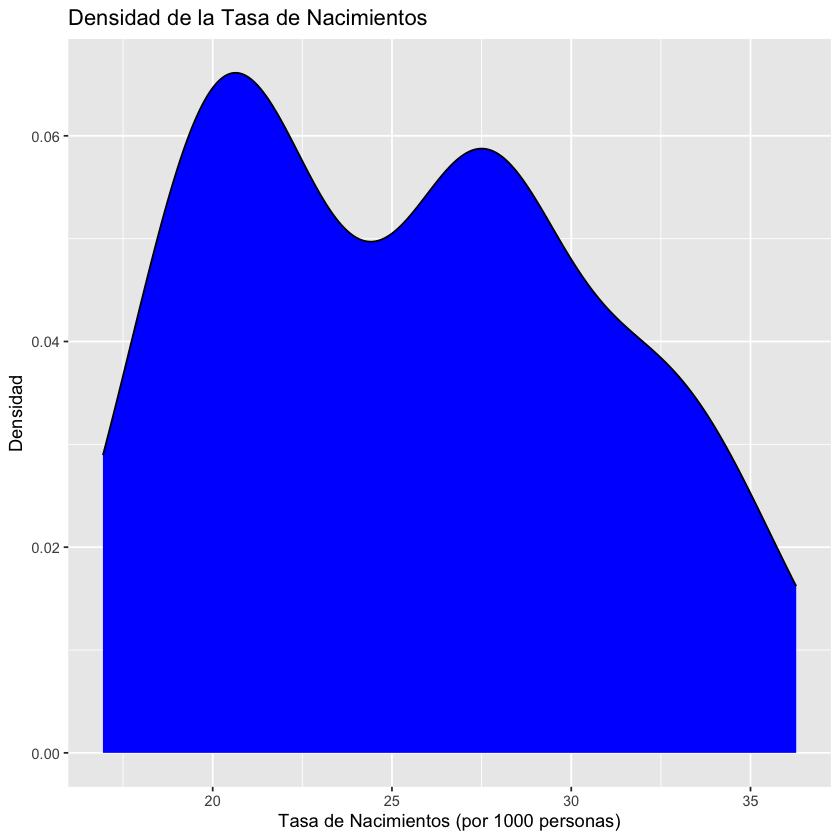

In [7]:
# Gráfico de densidad de la tasa de nacimientos
ggplot(births_data, aes(x = SP.DYN.CBRT.IN)) +
  geom_density(fill = "blue", color = "black") +
  labs(title = "Densidad de la Tasa de Nacimientos",
       x = "Tasa de Nacimientos (por 1000 personas)",
       y = "Densidad")

In [8]:
# Convertir los datos a una serie temporal
births_ts <- ts(births_data$SP.DYN.CBRT.IN, start = min(births_data$year), end = max(births_data$year), frequency = 1)

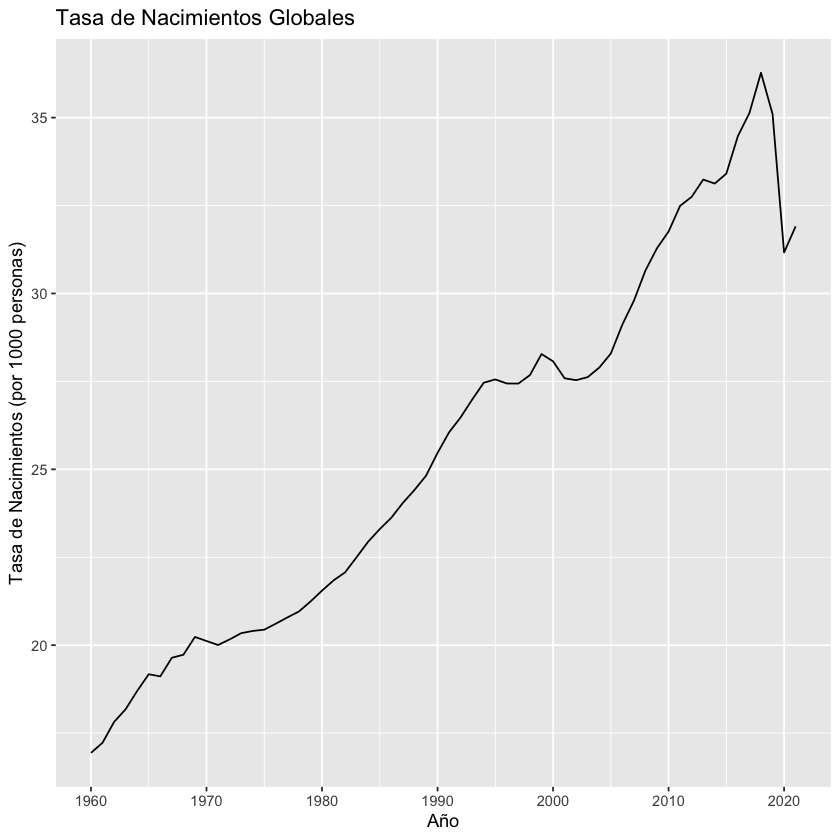

In [9]:
# Visualizar la serie temporal
autoplot(births_ts) + ggtitle("Tasa de Nacimientos Globales") + xlab("Año") + ylab("Tasa de Nacimientos (por 1000 personas)")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.94   20.48   25.76   25.52   28.91   36.27 

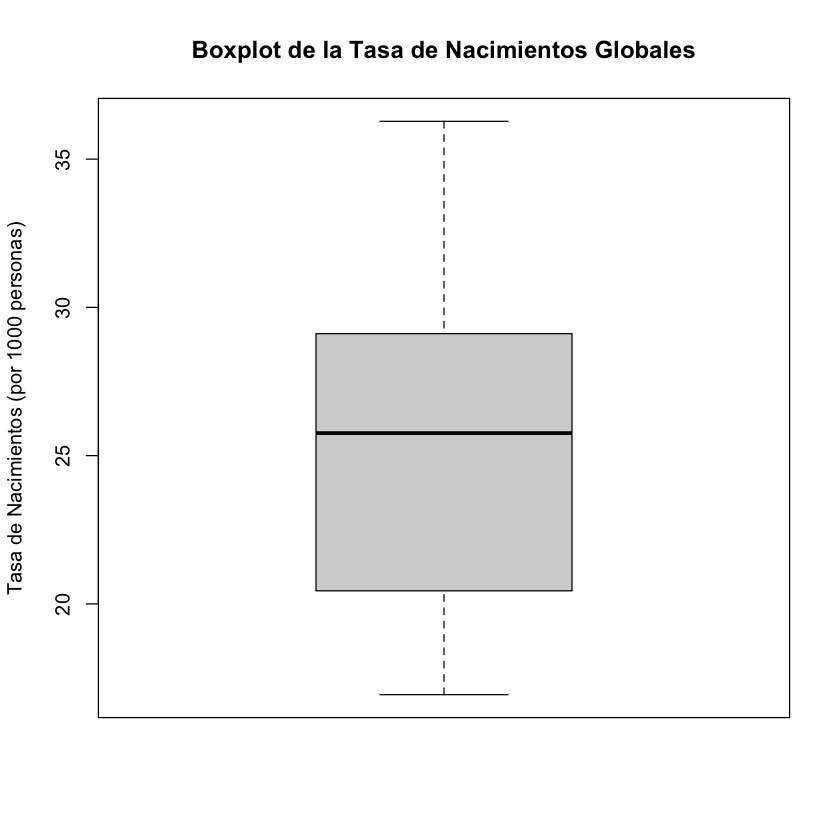

In [10]:
# Estadísticas descriptivas
summary(births_ts)

# Boxplot de la serie temporal
boxplot(births_ts, main = "Boxplot de la Tasa de Nacimientos Globales", ylab = "Tasa de Nacimientos (por 1000 personas)")

Series: births_ts 
ARIMA(2,1,1) with drift 

Coefficients:
          ar1      ar2     ma1   drift
      -0.2081  -0.4319  0.7110  0.2666
s.e.   0.2147   0.2189  0.1647  0.0769

sigma^2 = 0.3494:  log likelihood = -53.05
AIC=116.11   AICc=117.2   BIC=126.66

Training set error measures:
                       ME      RMSE       MAE           MPE     MAPE      MASE
Training set 0.0008524913 0.5667799 0.3485377 -0.0003053014 1.295187 0.7670723
                    ACF1
Training set -0.01303583

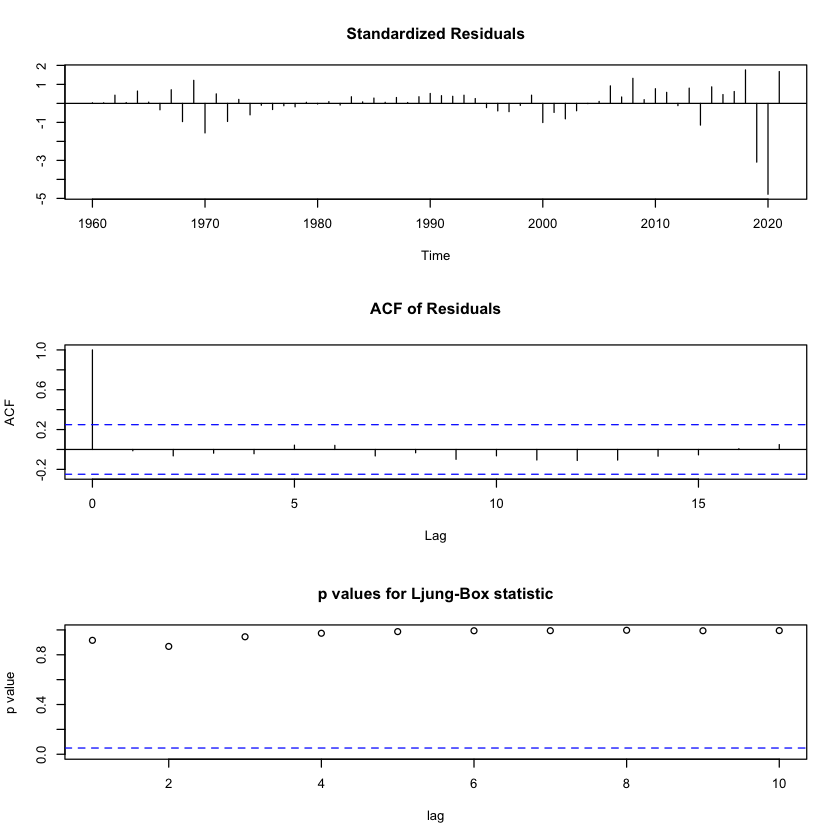


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1) with drift
Q* = 2.184, df = 7, p-value = 0.949

Model df: 3.   Total lags used: 10



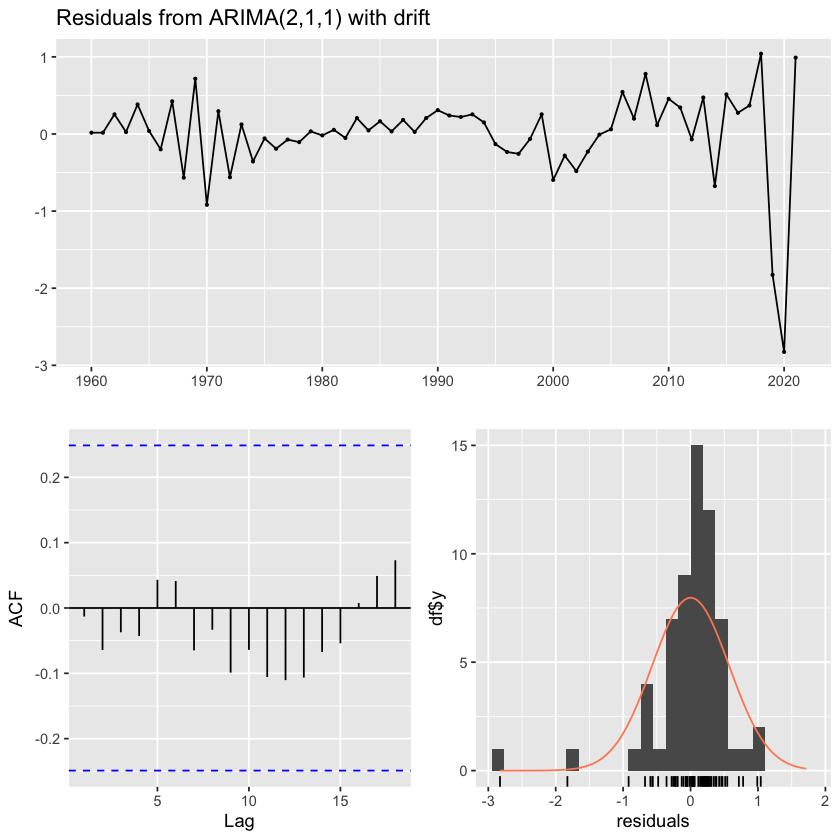

In [11]:
# Ajustar un modelo ARIMA
fit <- auto.arima(births_ts)

# Resumen del modelo
summary(fit)

# Diagnóstico del modelo
tsdiag(fit)

# Residuos del modelo
checkresiduals(fit)

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2022       34.59571 33.83817 35.35326 33.43715 35.75428
2023       34.15274 32.78526 35.52023 32.06136 36.24413
2024       33.52137 31.97029 35.07245 31.14920 35.89354
2025       34.28128 32.59872 35.96384 31.70803 36.85454
2026       34.83305 32.95056 36.71555 31.95402 37.71208
2027       34.82719 32.76628 36.88811 31.67530 37.97909
2028       35.02728 32.83176 37.22279 31.66953 38.38503
2029       35.42537 33.09664 37.75409 31.86389 38.98684
2030       35.69330 33.22850 38.15809 31.92371 39.46288
2031       35.90279 33.31364 38.49193 31.94303 39.86254


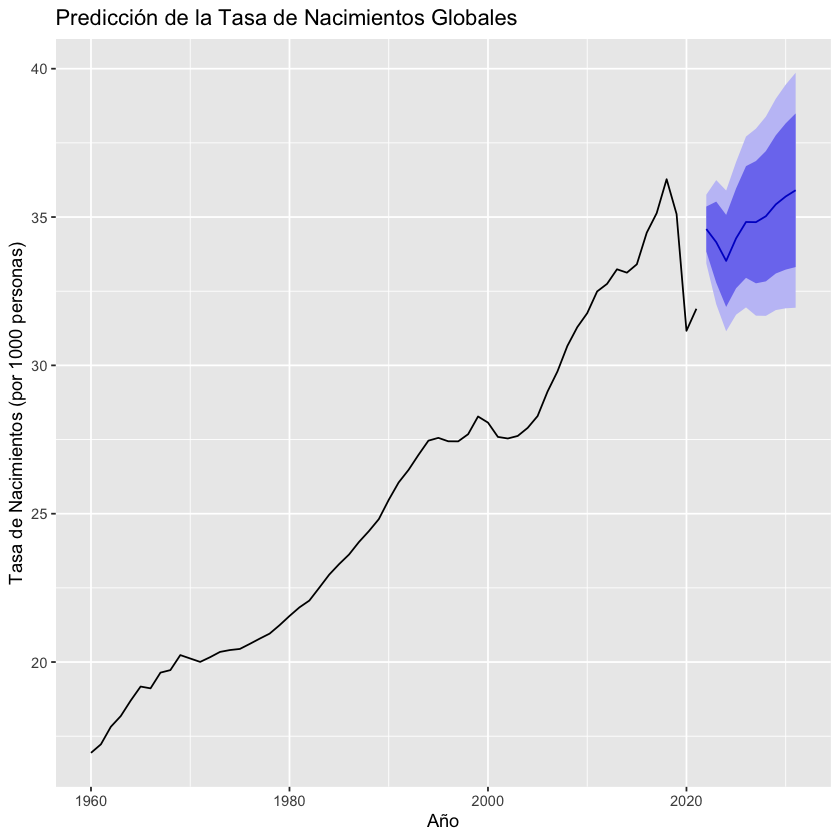

In [12]:
# Realizar la predicción para los próximos 10 años
forecasted_births <- forecast(fit, h = 10)

# Visualizar la predicción
autoplot(forecasted_births) + ggtitle("Predicción de la Tasa de Nacimientos Globales") + xlab("Año") + ylab("Tasa de Nacimientos (por 1000 personas)")

# Imprimir la predicción
print(forecasted_births)